In [ ]:
!pip install labelme tensorflow opencv-python matplotlib numpy albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 105.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.0 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.5.0-py3-none-any.whl size=1437463 sha256=0c9e160a9a3ed8696450bd35ebc030dc09f5925655be1a8825e1b1f7999a946b
  Stored in directory: /root/.cache/pip/wheels/44/3a/

In [ ]:
import os #join filepath and list stuff in directory
import time
import uuid #for unique uniform identifier
import cv2 #image processing

In [ ]:
images_path = os.path.join('data', 'images')
imgnum = 30

###Capturing Images using Webcam


In [ ]:
#  Try different camera indices
for camera_index in range(4):  # Check indices 0 to 4
    capture = cv2.VideoCapture(camera_index)
    if capture.isOpened():
        print(f"Found camera at index {camera_index}")
        break
    else:
        capture.release()  # Release if not opened
        print(f"Camera not found at index {camera_index}")

if not capture.isOpened():
    raise IOError("Cannot open webcam")

for imgnum in range(number_images): #capturing 30 images
    print('Collecting image {}'.format(imgnum)) #number of image
    ret, frame = capture.read() #capturing
    imgnumpath = os.path.join(images_path, f'{str(uuid.uuid1())}.jpg') #generating new name using uuid and storing in the image_path
    cv2.imwrite(imgnumpath, frame) #write
    cv2.imshow('frame', frame) #show it once
    time.sleep(1)

    if cv2.waitKey(1) & 0xFF == ord('q'): #cv2 break code
        break
capture.release()
cv2.destroyAllWindows()

###Review dataset and build load image function


In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
images = tf.data.Dataset.list_files('data/images/*.jpg')

def load_image(x): #function to load image
    byte_img = tf.io.read_file(x) #byte encoded image
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image) #apply for all images

In [ ]:
images.as_numpy_iterator().next()

array([[[144, 152, 141],
        [146, 154, 143],
        [143, 151, 140],
        ...,
        [153, 154, 146],
        [152, 153, 145],
        [147, 148, 140]],

       [[142, 150, 139],
        [147, 155, 144],
        [149, 157, 146],
        ...,
        [150, 151, 143],
        [147, 148, 140],
        [149, 150, 142]],

       [[161, 169, 156],
        [145, 153, 140],
        [148, 156, 143],
        ...,
        [147, 148, 140],
        [146, 147, 139],
        [151, 152, 144]],

       ...,

       [[ 97,  99,  94],
        [ 90,  92,  87],
        [ 70,  72,  67],
        ...,
        [211, 201, 189],
        [215, 207, 194],
        [217, 209, 196]],

       [[ 84,  87,  80],
        [ 72,  75,  68],
        [ 90,  92,  87],
        ...,
        [207, 195, 183],
        [209, 197, 185],
        [211, 199, 187]],

       [[ 75,  78,  71],
        [ 71,  74,  67],
        [105, 107, 102],
        ...,
        [201, 187, 176],
        [198, 184, 173],
        [197, 183, 172]]


###Reviewing Raw Images

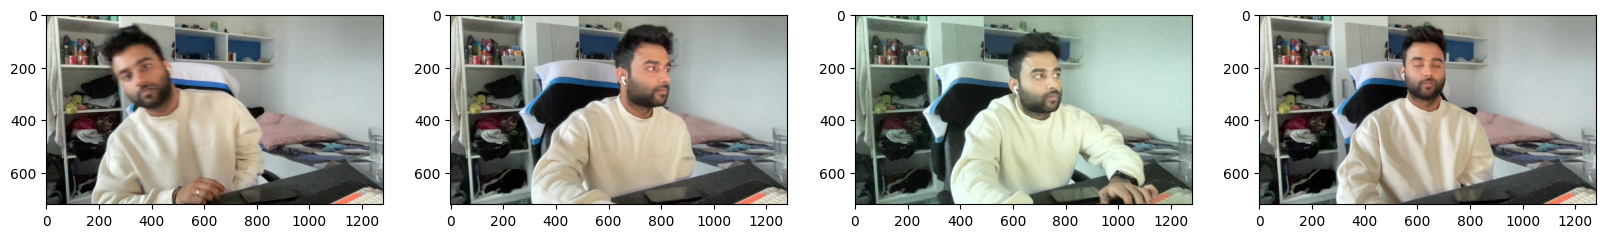

In [ ]:
image_generator = images.batch(4).as_numpy_iterator() #looping through images through batch of 4
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()


In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

###Applying Image Augmentation on Images and Labels using Albumentations

In [ ]:
img=cv2.imread(os.path.join('data','train', 'images','3a4dc1e6-a269-11ef-b29c-8270abcc2bce.jpg'))
img.shape

(720, 1280, 3)

In [ ]:
import albumentations as alb
augmentor = alb.Compose([alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


**Using augmentation on 1 test image**

In [ ]:
img = cv2.imread(os.path.join('data','train', 'images','36230090-a269-11ef-b29c-8270abcc2bce.jpg')) #opening image
with open(os.path.join('data', 'train', 'labels', '36230090-a269-11ef-b29c-8270abcc2bce.json'), 'r') as f:
    label = json.load(f) #corresponding label
label['shapes'][0]['points']

[[696.9230769230769, 166.15384615384616], [840.0, 369.23076923076917]]

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords #pascal voc format

[696.9230769230769, 166.15384615384616, 840.0, 369.23076923076917]

In [ ]:
coords = list(np.divide(coords, [1280,720,1280,720]))
coords #albumentation format after dividing my width and height

[0.5444711538461539, 0.23076923076923078, 0.65625, 0.5128205128205128]

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
augmented['bboxes']

[[0.5444711446762085, 0.4871794581413269, 0.65625, 0.7692307680845261]]

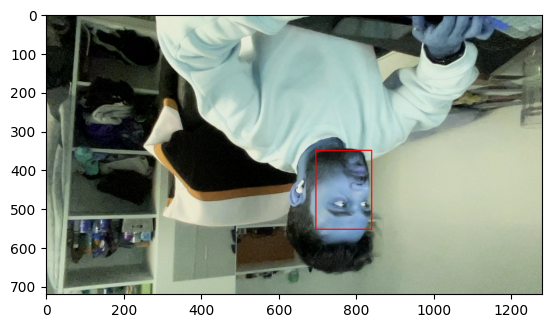

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [1280 ,720]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [1280,720]).astype(int)),
                    (255,0,0), 2)
plt.imshow(augmented['image'])


**Applying Augemntation to all images**

In [ ]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1280,720,1280,720]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.44110578 0.13675214 0.34615386 0.41452992 0.        ].


In [ ]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.6928105 , 0.78300655, 0.67320263],
        [0.71568626, 0.7941176 , 0.6862745 ],
        [0.71405226, 0.7924836 , 0.6826797 ],
        ...,
        [0.23202693, 0.322223  , 0.2986936 ],
        [0.2254902 , 0.31862745, 0.28627452],
        [0.22843568, 0.33431804, 0.30686706]],

       [[0.71535945, 0.8055555 , 0.70359474],
        [0.7382353 , 0.82254905, 0.7147059 ],
        [0.7375817 , 0.81209147, 0.70228755],
        ...,
        [0.21732034, 0.2996733 , 0.2722223 ],
        [0.25882354, 0.3372549 , 0.3019608 ],
        [0.2098068 , 0.31568915, 0.28823817]],

       [[0.7392157 , 0.81764704, 0.7117647 ],
        [0.70490193, 0.7862745 , 0.6764706 ],
        [0.71111107, 0.78954244, 0.6797385 ],
        ...,
        [0.27451077, 0.34117743, 0.3098049 ],
        [0.28921568, 0.3735294 , 0.3372549 ],
        [0.17222397, 0.27189702, 0.24346612]],

       ...,

       [[0.67614377, 0.8094771 , 0.7428104 ],
        [0.66764706, 0.79901963, 0.7323529 ],
        [0.6565359 , 0

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3438, 0.487 , 0.4556, 0.769 ], dtype=float16))

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)


(3720, 3720, 840, 840, 780, 780)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[0].shape


(8, 120, 120, 3)

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()


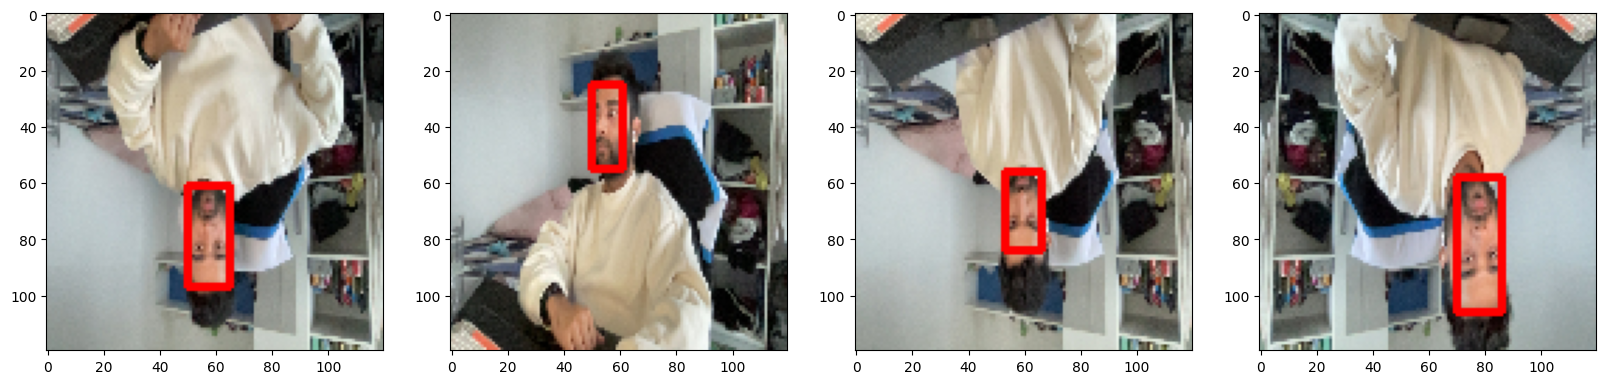

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # Create a writable copy of the image
    sample_image = sample_image.copy()

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

###VGG download and Fine-Tuning


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(include_top=False) #last layers not needed, will add regression layers


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    classificationlayer1 = Dense(2048, activation='relu')(f1)
    classificationlayer2 = Dense(1, activation='sigmoid')(classificationlayer1) #sigmoid for 0/1 for class

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regressionlayer1 = Dense(2048, activation='relu')(f2)
    regressionlayer2 = Dense(4, activation='sigmoid')(regressionlayer1) #sigmoid cause normalised

    facetracker = Model(inputs=input_layer, outputs=[classificationlayer2, regressionlayer2])
    return facetracker

In [ ]:
facetracker = build_model()
facetracker.summary()#dense maps to dense_1, dense_2 maps to dense_3

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 120, 120, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 3, 3, 512)      │     14,714,688 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d      │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_1    │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2048)           │      1,050,624 │ global_max_pooling2d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 2048)           │      1,050,624 │ global_max_pooling2d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          2,049 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │          8,196 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X, y = train.as_numpy_iterator().next()
X.shape

(8, 120, 120, 3)

**Loss**

In [ ]:
batches_per_epoch = len(train)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,)

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) #

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

**Training**

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        X, y = batch
        y[0].set_shape([None,1])


        print(f"Shape of y[0]: {y[0].shape}")
        print(f"Shape of y[1]: {y[1].shape}")

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5 * batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)
        y[0].set_shape([None,1])


        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #setting up log for monitoring

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
Shape of y[0]: (None, 1)
Shape of y[1]: <unknown>
Shape of y[0]: (None, 1)
Shape of y[1]: <unknown>
465/465 ━━━━━━━━━━━━━━━━━━━━ 86s 106ms/step - class_loss: 0.0380 - regress_loss: 0.1108 - total_loss: 0.1298 - val_class_loss: 0.0416 - val_regress_loss: 0.2143 - val_total_loss: 0.2351
Epoch 2/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 120s 84ms/step - class_loss: 2.2252e-04 - regress_loss: 0.0099 - total_loss: 0.0101 - val_class_loss: 5.0101e-05 - val_regress_loss: 0.0042 - val_total_loss: 0.0043
Epoch 3/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 58s 80ms/step - class_loss: 7.2488e-05 - regress_loss: 0.0049 - total_loss: 0.0050 - val_class_loss: 1.8532e-05 - val_regress_loss: 0.0051 - val_total_loss: 0.0051
Epoch 4/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 60s 87ms/step - class_loss: 2.6187e-05 - regress_loss: 0.0023 - total_loss: 0.0024 - val_class_loss: 3.4355e-06 - val_regress_loss: 0.0046 - val_total_loss: 0.0046
Epoch 5/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - class_loss: 1.3610e-05 - regress_l

**Testing**

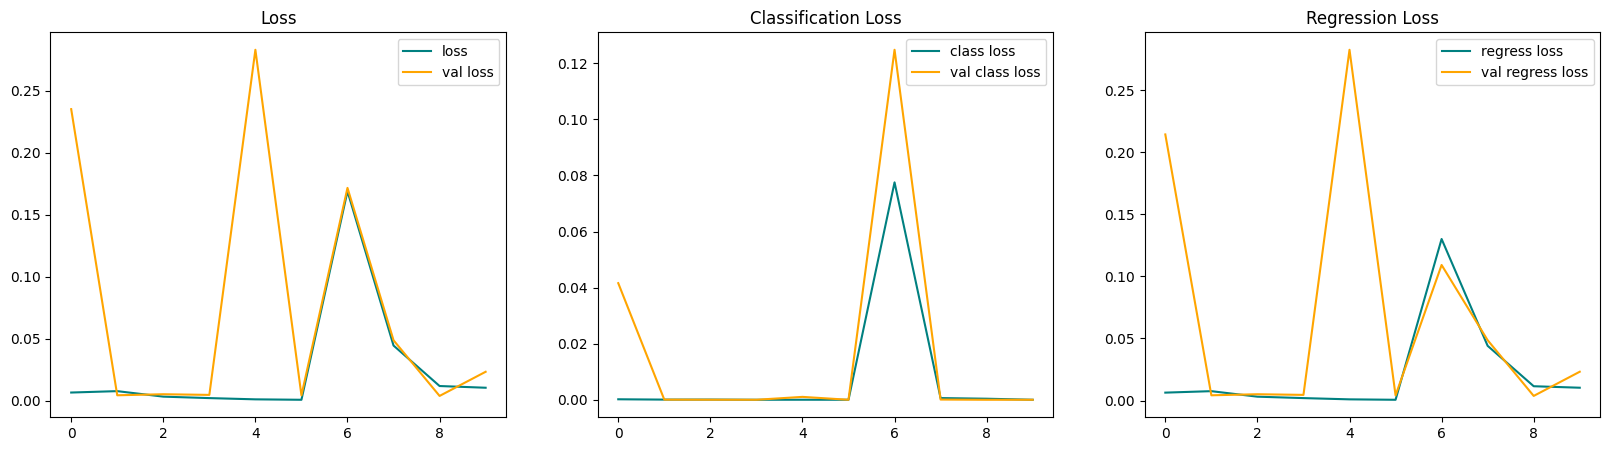

In [ ]:
hist.history
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


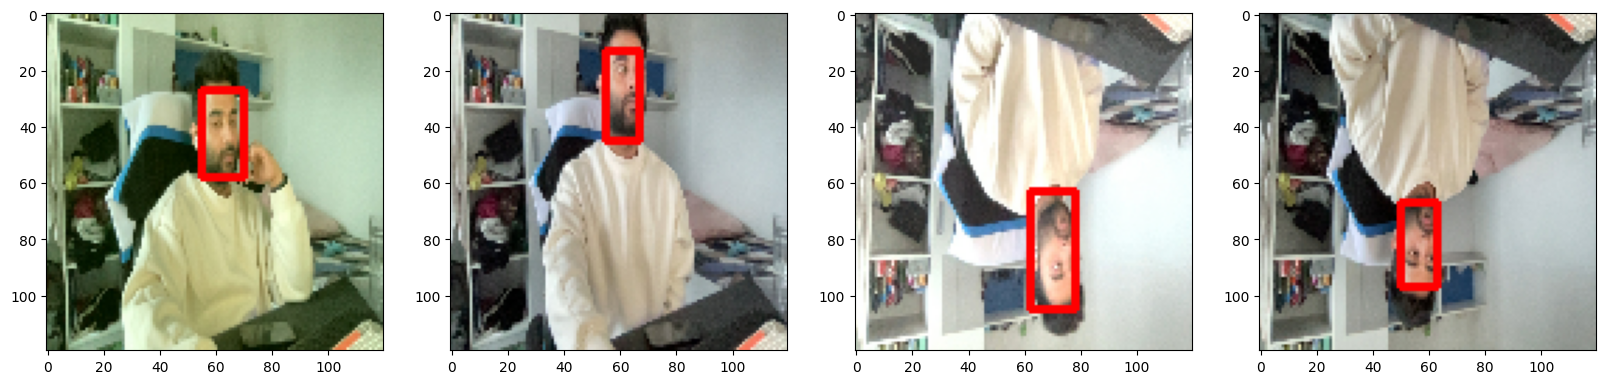

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    # Create a copy of sample_image to allow modification
    image_copy = sample_image.copy()

    if yhat[0][idx] > 0.9:
        cv2.rectangle(image_copy,  # Use the copy here
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(image_copy) # Display the modified copy

In [ ]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.keras')
